<a href="https://colab.research.google.com/github/opanasyuzhenkova/5term-lr12-openweathermap-matplotlib/blob/master/5term_lab13_currencies_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np
from urllib.request import urlopen
from xml.etree import ElementTree as ET


def get_currencies(currencies_ids_lst=None):

    if currencies_ids_lst is None:
        currencies_ids_lst = ['R01239', 'R01235', 'R01035', 'R01700J', 'R01820',
                              'R01335', 'R01090B', 'R01215', 'R01535', 'R01760']
    cur_res_str = urlopen("http://www.cbr.ru/scripts/XML_daily.asp")
    result = {}
    cur_res_xml = ET.parse(cur_res_str)
    root = cur_res_xml.getroot()
    valutes = root.findall('Valute')
    for el in valutes:
        valute_id = el.get('ID')
        valute_charcode = el.find('CharCode').text
        if str(valute_id) in currencies_ids_lst:
            valute_cur_val = el.find('Value').text
            result[valute_charcode] = valute_cur_val
    print(result)
    return result


cur_vals = get_currencies()
objects = cur_vals.keys()


print(cur_vals)
y_pos = np.arange(len(objects))


{'GBP': '82,3438', 'BYN': '25,6978', 'DKK': '97,7713', 'USD': '68,4487', 'EUR': '72,6226', 'KZT': '14,8167', 'NOK': '69,4150', 'TRY': '36,6506', 'CZK': '29,9885', 'JPY': '51,6594'}
{'GBP': '82,3438', 'BYN': '25,6978', 'DKK': '97,7713', 'USD': '68,4487', 'EUR': '72,6226', 'KZT': '14,8167', 'NOK': '69,4150', 'TRY': '36,6506', 'CZK': '29,9885', 'JPY': '51,6594'}


In [37]:
# performance = list(map(lambda x: float(x.replace(",",".")), cur_vals.values()))
performance = [float(x.replace(",", ".")) for x in cur_vals.values()]
print(performance)

[82.3438, 25.6978, 97.7713, 68.4487, 72.6226, 14.8167, 69.415, 36.6506, 29.9885, 51.6594]


82.3438
25.6978
97.7713
68.4487
72.6226
14.8167
69.415
36.6506
29.9885
51.6594


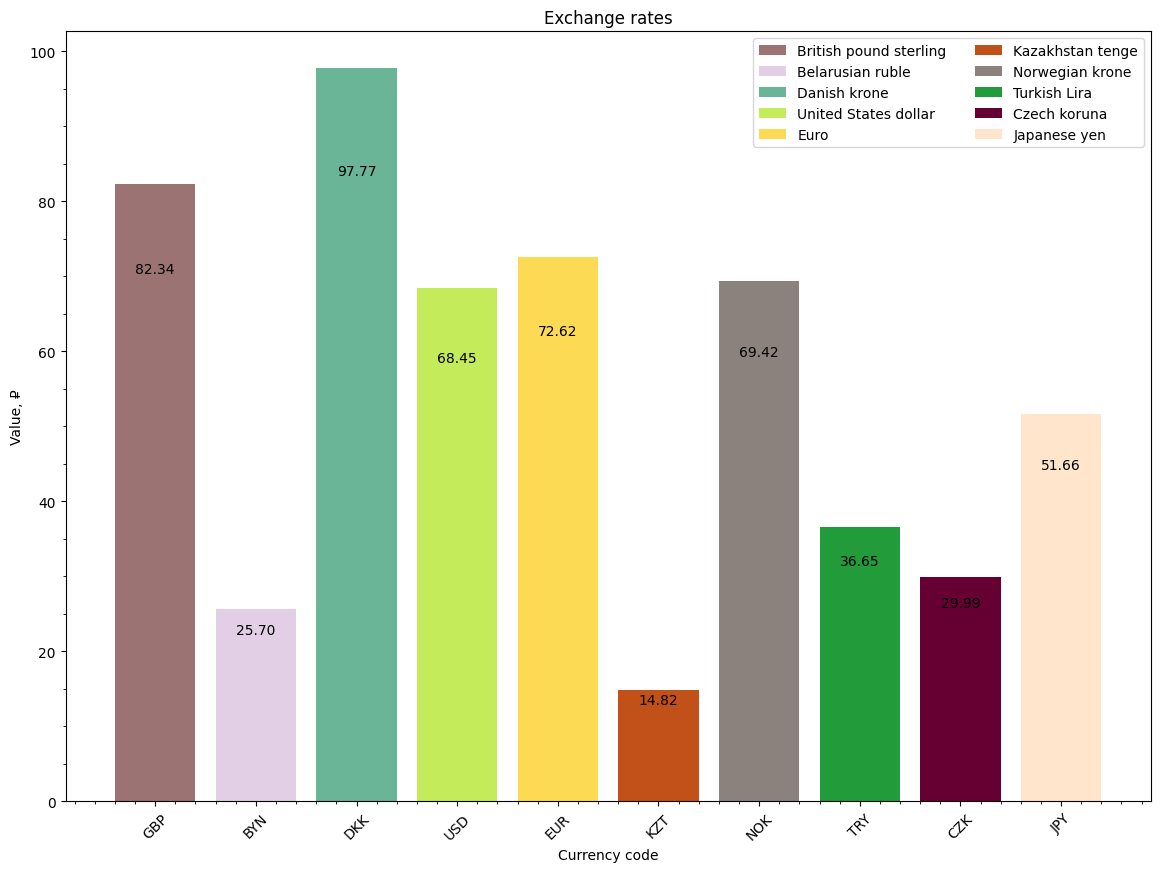

In [46]:
fig = plt.figure(figsize=(14, 10))
rate_bar = plt.bar(y_pos, performance, color=['#9B7373', '#E2CFE5', '#6AB597', '#C4EB5A', '#FCDA54', '#C15119', '#8B827D',
                                        '#229B3A', '#660033', '#FFE5CC'])


plt.xticks(y_pos, objects, rotation=45)
plt.minorticks_on()
plt.ylabel('Value, ₽')
plt.xlabel('Currency code')
plt.title('Exchange rates')
plt.legend(rate_bar, ('British pound sterling', 'Belarusian ruble', 'Danish krone', 'United States dollar',
                      'Euro', 'Kazakhstan tenge', 'Norwegian krone', 'Turkish Lira', 'Czech koruna', 'Japanese yen'),
           ncol=2, fontsize=10, bbox_to_anchor=(1, 1))


def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        #print(height)
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%.2f' % height
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')


ax = plt.gca()
autolabel(ax.patches, height_factor=0.85)

plt.show()
